In [103]:
# Import necessary module
import cv2                        # For Read Image
import matplotlib.pyplot as plt   # For Displaying Image
import numpy as np                # Linear Algebra
import pandas as pd               # For data manipulation and analysis.
import os                         # For Navigate Directory
import tensorflow as tf           # For creating CNN
from PIL import Image             # For Process/Preparing Image
from sklearn.model_selection import train_test_split    # For splitting training & testing data

In [113]:
images = []
labels = []

# Read Input - Parasitized Cell
infected_images_dir = os.listdir("C:/Users/Albert Kurniawan/Downloads/Cell_Images/Parasitized/")
infected_images = [image for image in infected_images_dir if image.endswith(".png")]

# preprocess images
for infected_image in infected_images:
    image = cv2.imread("C:/Users/Albert Kurniawan/Downloads/Cell_Images/Parasitized/" + infected_image)
    image_from_array = Image.fromarray(image, "RGB")
    size_image = image_from_array.resize((50, 50))
    images.append(np.array(size_image))
    labels.append(1)

# Read Input - Uninfected Cell
uninfected_images_dir = os.listdir("C:/Users/Albert Kurniawan/Downloads/Cell_Images/Uninfected/")
uninfected_images = [image for image in uninfected_images_dir if image.endswith(".png")]

# preprocess images
for uninfected_image in uninfected_images:
    image = cv2.imread("C:/Users/Albert Kurniawan/Downloads/Cell_Images/Uninfected/" + uninfected_image)
    image_from_array = Image.fromarray(image, "RGB")
    size_image = image_from_array.resize((50, 50))
    images.append(np.array(size_image))
    labels.append(0)

In [114]:
images = np.array(images)
labels = np.array(labels)

print(f"Datasets berisi: {len(images)} gambar sel darah merah.")
print(f"Sel darah merah yang terinfeksi malaria: {np.mean(labels) * 100}%")

Datasets berisi: 27558 gambar sel darah merah.
Sel darah merah yang terinfeksi malaria: 50.0%


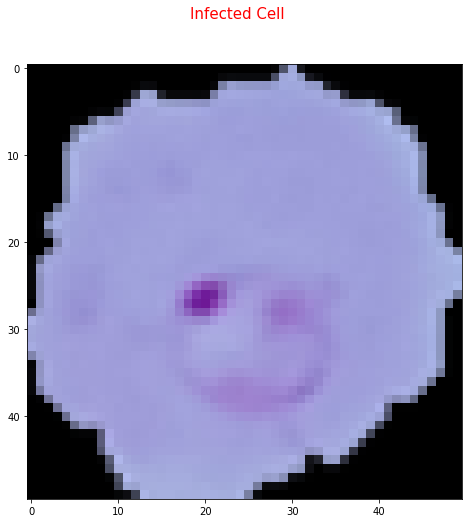

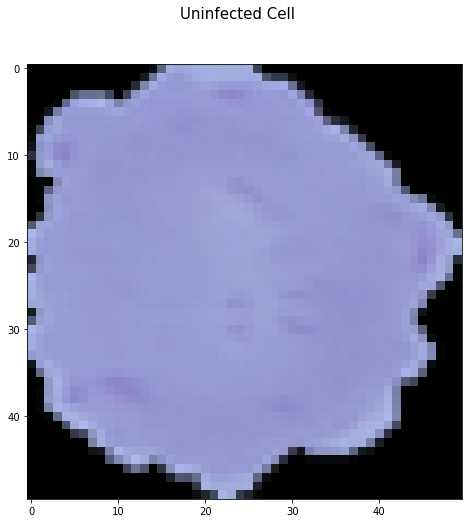

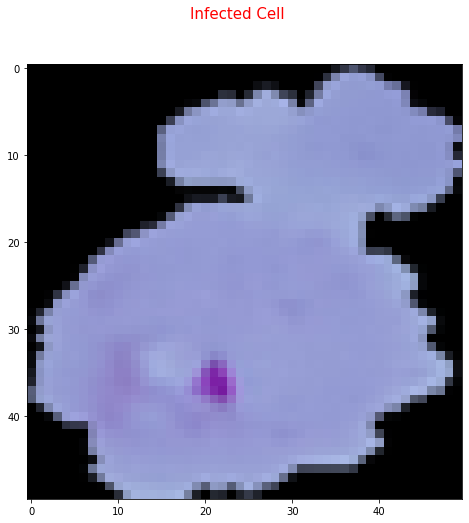

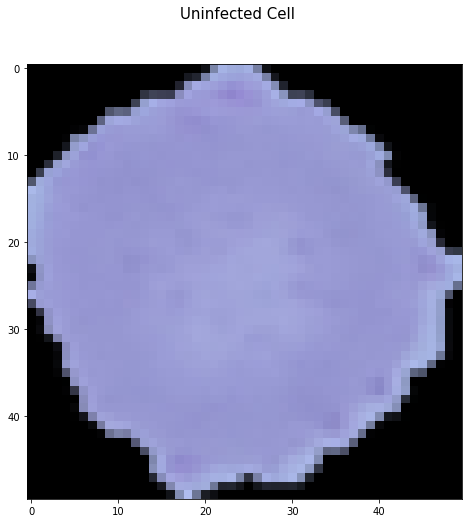

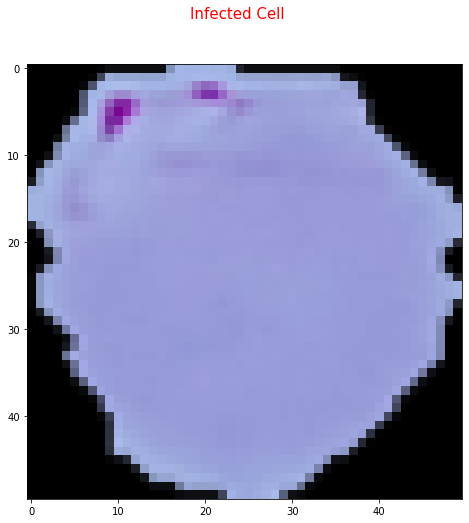

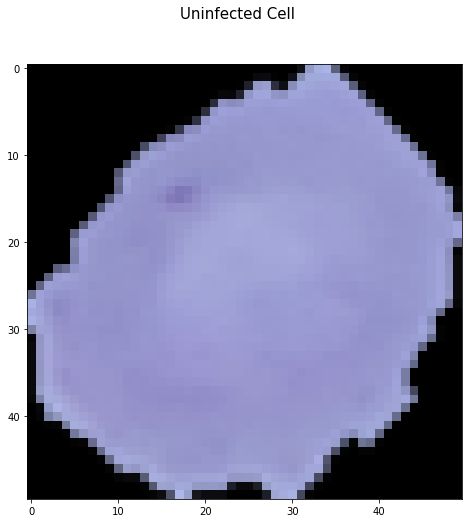

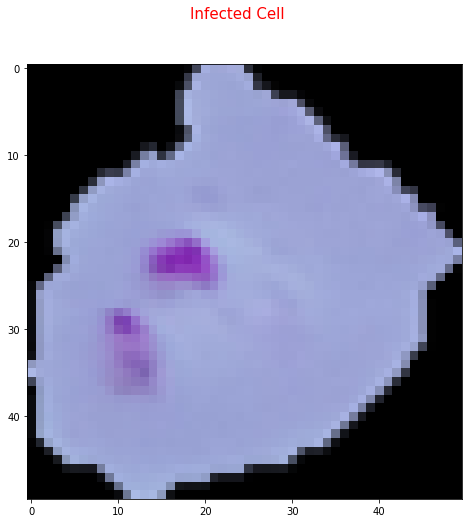

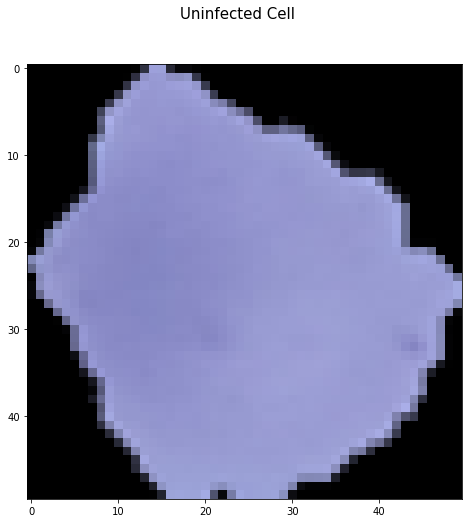

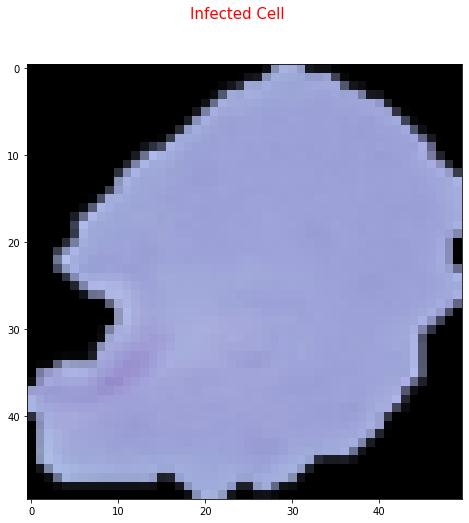

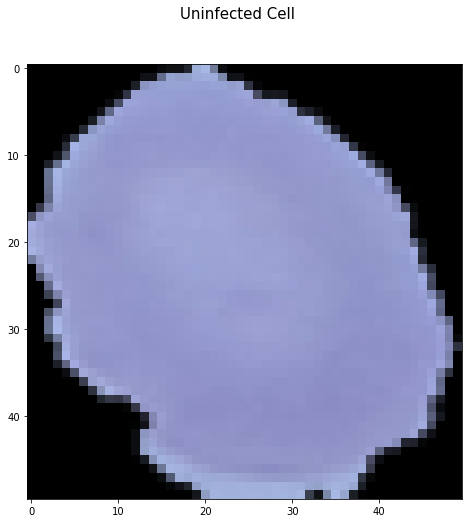

In [115]:
# Cek gambar
for i in range(5):
#   Infected Cell
    image = images[i]
    label = labels[i]
    fig = plt.figure(figsize=(8, 8))
    fig.suptitle(("Infected Cell" if label == 1 else "Uninfected Cell"), fontsize=15, color="red")
    plt.imshow(image)
    plt.show()
    
#   Uninfected Cell
    image = images[-i-1]
    label = labels[-i-1]
    fig = plt.figure(figsize=(8, 8))
    fig.suptitle(("Infected Cell" if label == 1 else "Uninfected Cell"), fontsize=15, color="black")
    plt.imshow(image)
    plt.show()

In [116]:
# Split data into training & testing using SKLearn Module
x_train, x_test, y_train, y_test = train_test_split(images, labels, test_size=0.2, random_state=42)

In [87]:
# Create CNN Model using Tensor Flow Module
def create_model():
    model = tf.keras.models.Sequential()
    model.add(tf.keras.layers.Conv2D(32, (3,3), padding="same", activation=tf.nn.relu, input_shape=(50, 50, 3)))
    model.add(tf.keras.layers.Dropout(0.5))
    model.add(tf.keras.layers.MaxPooling2D((2, 2)))
    model.add(tf.keras.layers.Conv2D(64, (3, 3), padding="same", activation=tf.nn.relu))
    model.add(tf.keras.layers.Dropout(0.5))
    model.add(tf.keras.layers.MaxPooling2D((2, 2)))
    model.add(tf.keras.layers.Conv2D(64, (3, 3), padding="same", activation=tf.nn.relu))
    model.add(tf.keras.layers.Dropout(0.5))
    model.add(tf.keras.layers.Flatten())
    model.add(tf.keras.layers.Dense(64, activation=tf.nn.relu))
    model.add(tf.keras.layers.Dense(10, activation=tf.nn.softmax))

    model.compile(optimizer="adam", loss="sparse_categorical_crossentropy", metrics=["accuracy"])
    return model

model = create_model()
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_3 (Conv2D)            (None, 50, 50, 32)        896       
_________________________________________________________________
dropout_3 (Dropout)          (None, 50, 50, 32)        0         
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 25, 25, 32)        0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 25, 25, 64)        18496     
_________________________________________________________________
dropout_4 (Dropout)          (None, 25, 25, 64)        0         
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 12, 12, 64)        0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 12, 12, 64)       

In [35]:
# Train CNN Model
# model.fit(x_train, y_train, epochs=20, batch_size=64, shuffle=True, verbose=1)

Epoch 1/20
345/345 [==============================] - 37s 107ms/step - loss: 18.5856 - accuracy: 0.5101
Epoch 2/20
345/345 [==============================] - 37s 107ms/step - loss: 0.7226 - accuracy: 0.5371
Epoch 3/20
345/345 [==============================] - 37s 107ms/step - loss: 0.7017 - accuracy: 0.5502
Epoch 4/20
345/345 [==============================] - 37s 108ms/step - loss: 0.6868 - accuracy: 0.5686
Epoch 5/20
345/345 [==============================] - 37s 107ms/step - loss: 0.6785 - accuracy: 0.5833
Epoch 6/20
345/345 [==============================] - 37s 106ms/step - loss: 0.6571 - accuracy: 0.6187
Epoch 7/20
345/345 [==============================] - 37s 106ms/step - loss: 0.5749 - accuracy: 0.7033
Epoch 8/20
345/345 [==============================] - 37s 106ms/step - loss: 0.2899 - accuracy: 0.8982
Epoch 9/20
345/345 [==============================] - 37s 106ms/step - loss: 0.2282 - accuracy: 0.9211
Epoch 10/20
345/345 [==============================] - 37s 106ms/step - 

In [ ]:
# Save trained model
# model.save('cell_classification_model')

In [117]:
# Load already trained model
model = tf.keras.models.load_model('cell_classification_model')

In [118]:
# Evaluate model accuracy
accuracy = model.evaluate(x_test, y_test, verbose=1)
print(f"Akurasi klarifikasi gambar yaitu: {np.round(accuracy[1] * 100, 2)}%")

173/173 [==============================] - 3s 15ms/step - loss: 0.1812 - accuracy: 0.9517
Akurasi klarifikasi gambar yaitu: 95.17%


In [119]:
# Make Prediction
pred = np.argmax(model.predict(x_test), 1)
pred

array([1, 1, 0, ..., 1, 1, 1], dtype=int64)

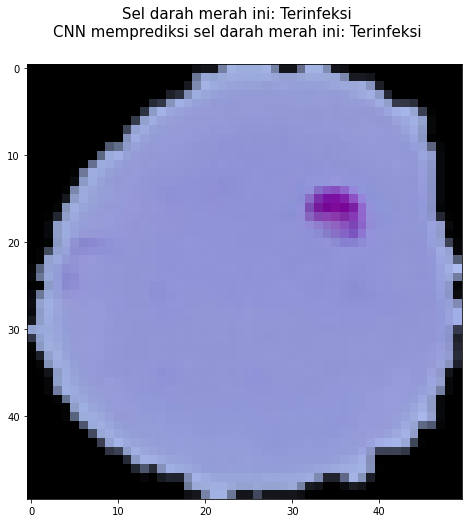

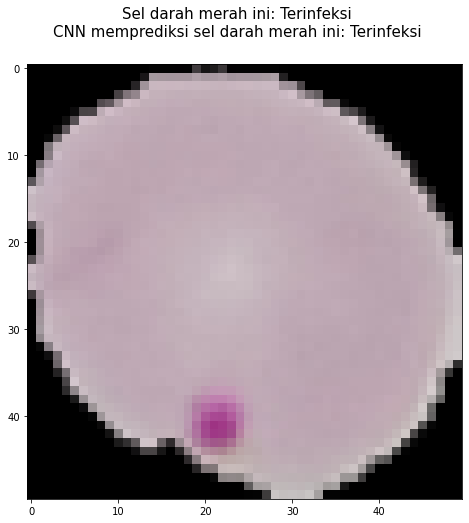

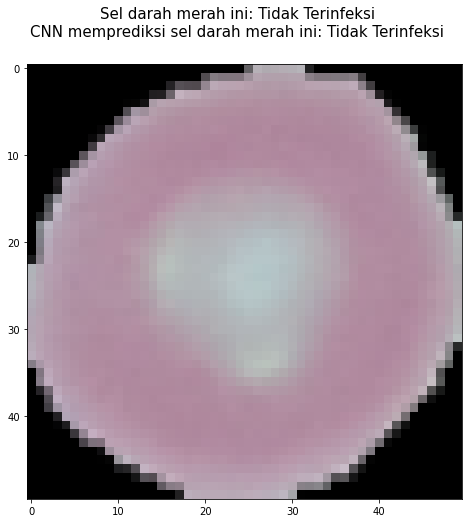

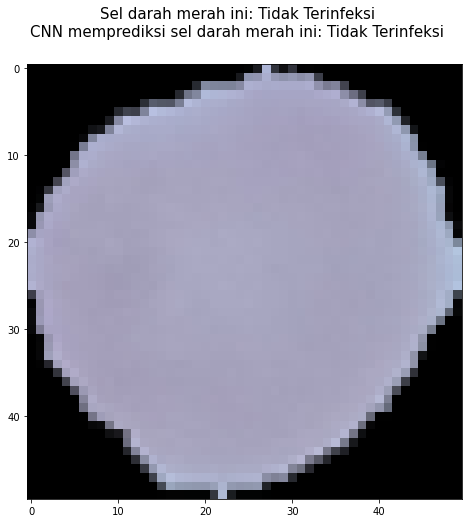

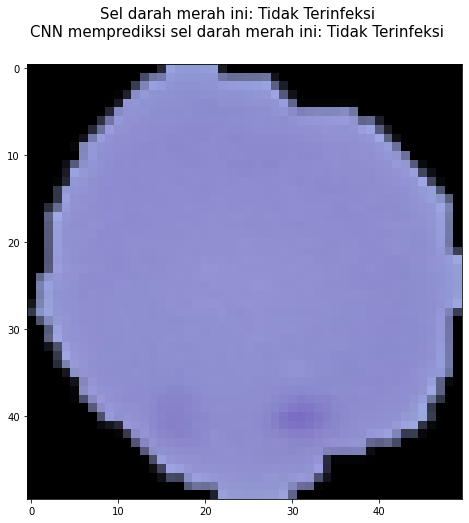

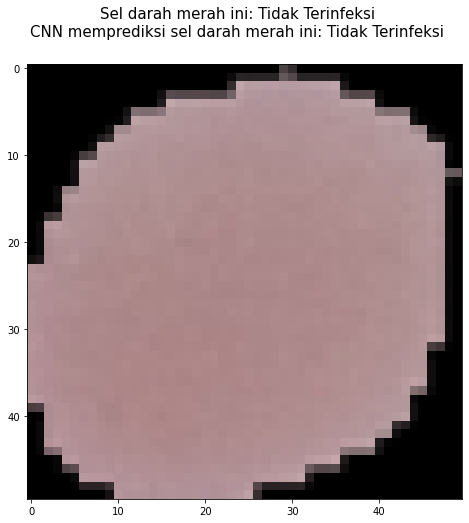

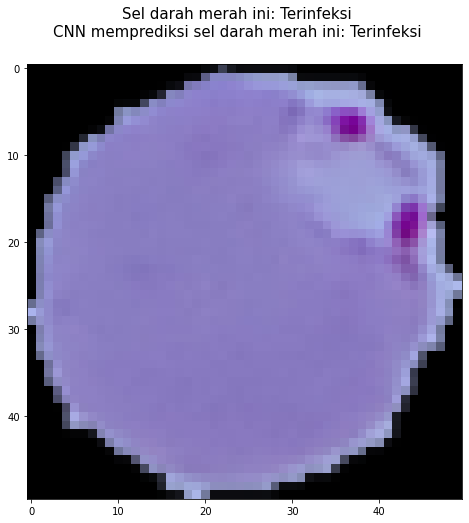

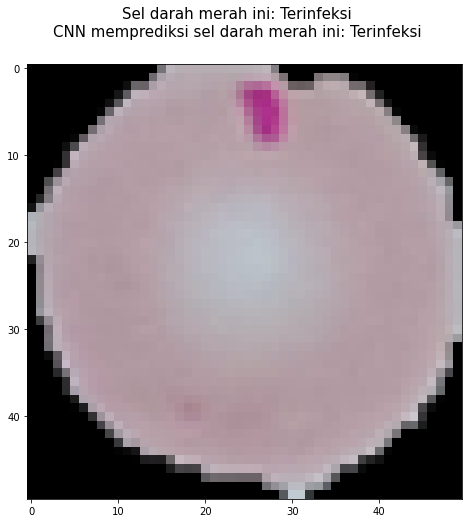

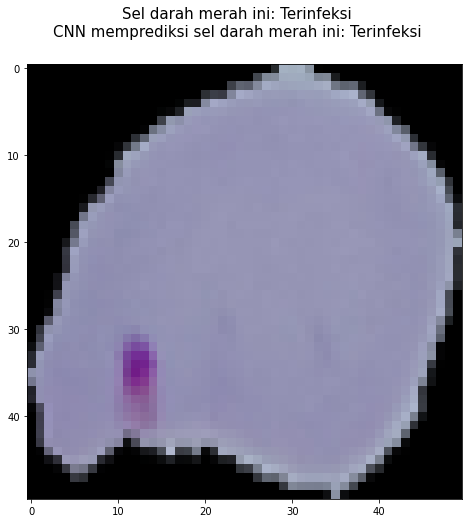

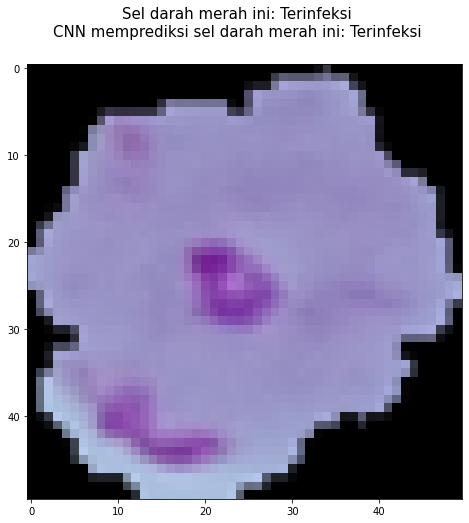

In [120]:
# Display predicted result and compare it with true value
for i in range(10):
    str_pred = ("Terinfeksi" if pred[i] == 1 else "Tidak Terinfeksi")
    str_true = ("Terinfeksi" if y_test[i] == 1 else "Tidak Terinfeksi")
    
    fig = plt.figure(figsize=(8, 8))
    fig.suptitle(f"Sel darah merah ini: {str_true}\nCNN memprediksi sel darah merah ini: {str_pred}", fontsize=15, color="black")
    plt.imshow(x_test[i])
    plt.show